<a href="https://colab.research.google.com/github/RenadAhmed/EFG_img_Task/blob/main/EFG_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

if tf.test.is_gpu_available():
    !pip install keras-ocr[tf-gpu]
else:
    !pip install keras_ocr

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.4 MB/s eta 0:00:00


In [2]:
import os
import cv2
import keras_ocr
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [3]:
from google.colab.patches import cv2_imshow

In [4]:
from IPython.display import Image

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 2s 2s/step
Detected word: difsoene
Detected word: cis
Detected word: lla
Detected word: aan
Inpainted image saved to: /content/output_image/output_image.jpg


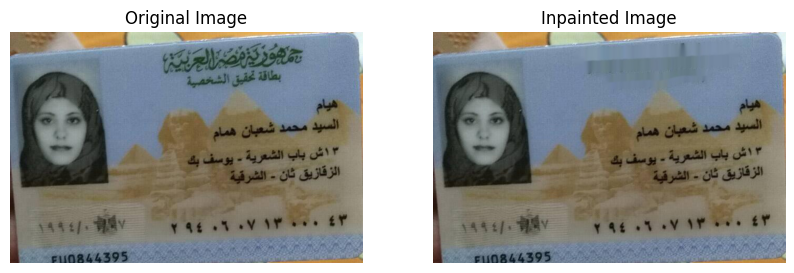

In [16]:
import matplotlib.pyplot as plt
import keras_ocr
import cv2
import math
import numpy as np

def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2) / 2)
    y_mid = int((y1 + y2) / 2)
    return (x_mid, y_mid)

pipeline = keras_ocr.pipeline.Pipeline()

def inpaint_text(img_path, pipeline):
    # Read image
    img = cv2.imread(img_path)

    # Generate (word, box) tuples
    prediction_groups = pipeline.recognize([img_path])

    # Create a mask
    mask = np.zeros(img.shape[:2], dtype="uint8")

    # Counter to keep track of the number of words removed
    words_removed = 0

    # Iterate over each detected box
    for box in prediction_groups[0]:
        # Checking if the maximum number of words to remove has been reached
        if words_removed == 4:
            break

        word = box[0]
        print("Detected word:", word)

        # Increment the counter
        words_removed += 1

        # Extracting coordinates of the box vertices
        x0, y0 = box[1][0]
        x1, y1 = box[1][1]
        x2, y2 = box[1][2]
        x3, y3 = box[1][3]

        # Calculating midpoints of opposite sides
        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mid1 = midpoint(x0, y0, x3, y3)

        # Calculating thickness as the distance between opposite corners
        thickness = int(math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2))

        # Drawing a line on the mask
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mid1), 255, thickness)

    # Inpainting the text regions in the original image
    img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)

    return img

def process_image(input_image_path, output_image_path):
    inpainted_image = inpaint_text(input_image_path, pipeline)
    cv2.imwrite(output_image_path, inpainted_image)
    print(f"Inpainted image saved to: {output_image_path}")

#create a folder named output_image to save the inpainted img
input_image_path = '/content/51.jpg'
output_image_path = '/content/output_image/output_image.jpg'
process_image(input_image_path, output_image_path)

# Displaying the original and inpainted images for verification
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv2.imread(input_image_path), cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(cv2.imread(output_image_path), cv2.COLOR_BGR2RGB))
plt.title("Inpainted Image")
plt.axis('off')

plt.show()
